In [1]:
import os
import numpy as np
import numpy.ma as ma
from astropy.table import Table
from scipy.optimize import minimize, Bounds
from DRP_rotation_curve import extract_data, extract_Pipe3d_data
from disk_mass import calc_mass_curve, fit_mass_curve
from rotation_fitfunctions import find_phi, parameterfit_iso, parameterfit_NFW, parameterfit_bur, rot_incl_iso, rot_incl_bur, \
rot_incl_NFW, chi2
from rotation_curve_functions import disk_bulge_vel, halo_vel_NFW, bulge_vel, disk_vel
import RC_plotting_functions as RC#import plot_diagnostic_panel
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import importlib
import rotation_fitfunctions
import rotation_curve_functions
importlib.reload(RC)
importlib.reload(rotation_fitfunctions)
importlib.reload(rotation_curve_functions)

<module 'rotation_curve_functions' from 'C:\\Users\\Lara\\Documents\\rotationcurves\\rotation_curve_functions.py'>

In [3]:
gal_ID = '7443-12705'
H_0 = 100  # Hubble's Constant in units of h km/s/Mpc
c = 299792.458  # Speed of light in units of km/s
fit_function = 'bulge'


In [4]:
MASS_MAP_FOLDER = r"C:\Users\Lara\Documents\rotationcurves\mangadata\pipe3d\v3_1_1\3.1.1\7443"
VEL_MAP_FOLDER = r"C:\Users\Lara\Documents\rotationcurves\mangadata\analysis\v3_1_1\3.1.0\HYB10-MILESHC-MASTARSSP\7443\12705"
DRP_FILENAME = r"C:\Users\Lara\Documents\rotationcurves\mangadata\redux\v3_1_1\drpall-v3_1_1.fits"

In [5]:
DRP_FILENAME = r"C:\Users\Lara\Documents\rotationcurves\mangadata\redux\v3_1_1\drpall-v3_1_1.fits"
DRP_table = Table.read( DRP_FILENAME, format='fits')


DRP_index = {}

for i in range(len(DRP_table)):
    galaxy_ID = DRP_table['plateifu'][i]

    DRP_index[galaxy_ID] = i


In [6]:
maps = extract_data(VEL_MAP_FOLDER,gal_ID,['Ha_vel', 'r_band', 'Ha_flux', 'Ha_sigma'])
sMass_density, sMass_density_err = extract_Pipe3d_data(MASS_MAP_FOLDER, gal_ID)
i_DRP = DRP_index[gal_ID]
axis_ratio = DRP_table['nsa_sersic_ba'][i_DRP]
incl = np.arccos(np.sqrt((axis_ratio**2 - 0.2**2)/1-0.2**2)) 
phi = DRP_table['nsa_elpetro_phi'][i_DRP]
print(incl)
print(phi)
z = DRP_table['nsa_z'][i_DRP]
print(z)
SN_map = maps['Ha_flux'] * np.sqrt(maps['Ha_flux_ivar'])
map_mask = maps['Ha_vel_mask'] + (SN_map < 5)




maps['vmasked'] = ma.array(maps['Ha_vel'], mask=map_mask)
maps['ivarmasked'] = ma.array(maps['Ha_vel_ivar'], mask=map_mask)

shape = maps['vmasked'].shape
scale = (0.5 * z * c / H_0) * 1000 / 206265  # kpc
center = np.unravel_index(ma.argmax(maps['r_band']), shape)
x_center = center[0]
y_center = center[1]
count = 0
phi = find_phi(center, phi, maps['vmasked'])
#param = [incl, phi, x_center, y_center]

1.3432236922176852
36.9388
0.0644735
-9.503156
(37, 37)
0.6447036817356814


In [322]:
ba = 

0.9936683303900276


In [326]:


#0.11259096400658039, 0.7257461163584406, 35.49489300431426, 36.873046417018436
mass_data_table = calc_mass_curve(sMass_density,
                                          sMass_density_err,
                                          maps['r_band'],
                                          map_mask,
                                          x_center,
                                          y_center,
                                          axis_ratio,
                                          phi,
                                          z,
                                          gal_ID)
print(gal_ID, "mass curve calculated")
param_outputs = fit_mass_curve(mass_data_table,
                                       gal_ID,
                                       fit_function, IMAGE_DIR=r"C:\Users\Lara\Documents\rotationcurves", IMAGE_FORMAT='png')
print(param_outputs)


finding mass curve
7443-12705 mass curve calculated


C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:387: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:396: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
C:\Users\Lara\Documents\rotationcurves\disk_mass_plotting_functions.py:89: RuntimeWarning: covariance is not positive-semidefinite.
  random_sample = np.random.multivariate_normal(mean=[fit_parameters['Sigma_disk'],
C:\Users\Lara\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


{'Sigma_disk': 651.0289797724238, 'Sigma_disk_err': 23.645780897327327, 'R_disk': 0.903804192022047, 'R_disk_err': 0.055308419145259295, 'rho_bulge': 120050641.10390615, 'rho_bulge_err': 6036564.759379746, 'R_bulge': 2.73444270675828, 'R_bulge_err': 0.047252136281033065, 'chi2_disk': 1167511.02154623}


In [291]:
SigD = param_outputs["Sigma_disk"]
Rd = param_outputs["R_disk"]
rho_bulge = param_outputs["rho_bulge"]
R_bulge = param_outputs["R_bulge"]

In [ ]:
best_fit_test = parameterfit_bur(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

In [18]:
best_fit_NFW = parameterfit_NFW(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:229: RuntimeWarning: invalid value encountered in double_scalars
  vel = np.sqrt(coeff_2 * F / r)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:347: RuntimeWarning: invalid value encountered in double_scalars
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:590: RuntimeWarning: invalid value encountered in double_scalars
  vel2 = G * (halo_mass * Msun) / (r * 3.08E16)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:589: RuntimeWarning: invalid value encountered in log
  halo_mass = 4*np.pi*rho0_h*Rh**3*((-r/(Rh+r)) + np.log(Rh + r) - np.log(Rh))


---------------------------------------------------
   direc: array([[-2.31020053e-15,  2.55722122e-02,  0.00000000e+00,
         2.11215090e-02, -2.78876663e-01, -9.21988336e-01,
        -3.05819485e+00],
       [-1.46518230e-01,  1.01468452e+00,  7.62907444e-03,
        -1.08332288e-02,  2.07978200e-02,  2.43076804e-01,
         2.82519194e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.93818082e-02,  7.73044442e-01,  3.34347082e-03,
         1.22390755e-02,  4.47035262e-01, -2.33127277e-01,
        -2.59229128e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-6.90350899e+00,  5.89531900e+01,  7.11462519e-01,
        -1.4921

In [19]:
best_fit_bur =parameterfit_bur(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:672: RuntimeWarning: invalid value encountered in double_scalars
  vel2 = G * (halo_mass * Msun) / (r * 3.08E16)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:674: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(vel2) / 1000
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:669: RuntimeWarning: invalid value encountered in log
  halo_mass = np.pi * (-rho0_h) * (Rh**3) * (-np.log(Rh**2 + r**2) - 2*np.log(Rh + r) + 2*np.arctan2(r,Rh) + np.log(Rh**2)\
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:670: RuntimeWarning: invalid value encountered in log
  + 2*np.log(Rh) - 2*np.arctan2(0,Rh))


---------------------------------------------------
   direc: array([[-0.1230956 ,  0.39888121,  0.        ,  0.0584556 , -0.27172749,
        -0.85110192,  1.03549347],
       [-0.14294654,  0.40766833,  0.        , -0.00915359,  1.59656528,
         1.89145506,  0.71565364],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [-0.0073258 ,  0.09101814,  0.        ,  0.00317397,  0.03323503,
        -0.15100138, -0.9796037 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [ 0.02539412, -0.199684  ,  0.        ,  0.00295798,  0.13579216,
        -0.02873742, -0.5337192 ]])
     fun: 75623.85496380848
 message: 'Optimization terminated successfully.'
    nfev: 2099
     nit: 21
  status: 0
 success: True
       x: array([ 1.11618989,  4.55702666,  0.10

In [292]:
best_fit_iso =parameterfit_iso(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

---------------------------------------------------
   direc: array([[-1.49369188e-01,  1.98784582e-01,  0.00000000e+00,
        -2.17655977e-02,  4.44850017e-01,  3.33664589e-01,
        -1.59142480e+00],
       [-3.05975248e-02,  3.62811076e-02,  0.00000000e+00,
        -2.07004511e-02, -1.00001068e+00, -7.85960779e-01,
        -1.65497543e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.31373077e-15,  6.41251301e-03,  0.00000000e+00,
         2.39997425e-02,  2.91448990e-01, -5.37381874e-01,
        -3.52654648e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-6.04583635e-02,  1.62405987e-01,  2.32025021e-03,
         6.3044

In [332]:



iso_fit = [param_outputs['rho_bulge'], param_outputs['R_bulge'], param_outputs['Sigma_disk'],
               param_outputs['R_disk'],best_fit_iso[0],best_fit_iso[1],best_fit_iso[2],best_fit_iso[3],best_fit_iso[4],best_fit_iso[5],best_fit_iso[6]]
NFW_fit = [param_outputs['rho_bulge'], param_outputs['R_bulge'], param_outputs['Sigma_disk'],
               param_outputs['R_disk'],best_fit_NFW[0],best_fit_NFW[1],best_fit_NFW[2],best_fit_NFW[3],best_fit_NFW[4],best_fit_NFW[5],best_fit_NFW[6]]
bur_fit = [param_outputs['rho_bulge'], param_outputs['R_bulge'], param_outputs['Sigma_disk'],
               param_outputs['R_disk'],best_fit_bur[0],best_fit_bur[1],best_fit_bur[2],best_fit_bur[3],best_fit_bur[4],best_fit_bur[5],best_fit_bur[6]]

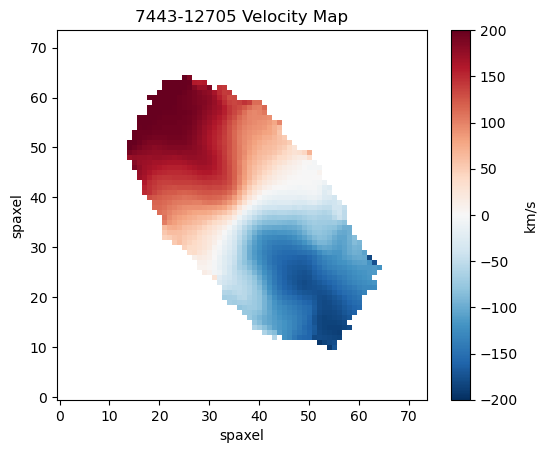

In [327]:
plt.imshow(maps['vmasked'], 
           origin='lower', 
           cmap='RdBu_r', 
           vmin=-200, 
           vmax=200)

plt.xlabel('spaxel')
plt.ylabel('spaxel')

cbar = plt.colorbar()
cbar.set_label('km/s')
plt.title('7443-12705 Velocity Map')
plt.savefig("7443-12705_data")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iso: [120050641.10390615, 2.73444270675828, 651.0289797724238, 0.903804192022047, -1.1004383291657658, 3.1034411951560106, 1.0753930641967842, 0.699932808737459, 36.60702475726927, 37.68059851207151, 13.951800854854437]
216.1523606396317
NFW [120050641.10390615, 2.73444270675828, 651.0289797724238, 0.903804192022047, -2.251955407489212, 25.502658833876982, 1.0759555322501546, 0.6990559321300809, 36.59462611334587, 37.68595223377552, 14.179451252970935]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


220.16661176058827
Bur: [120050641.10390615, 2.73444270675828, 651.0289797724238, 0.903804192022047, -1.0939294679703189, 5.478764398065083, 1.0758183565458606, 0.7002491653719471, 36.62910970880082, 37.6821848135174, 13.757226286920673]
214.45686244725545


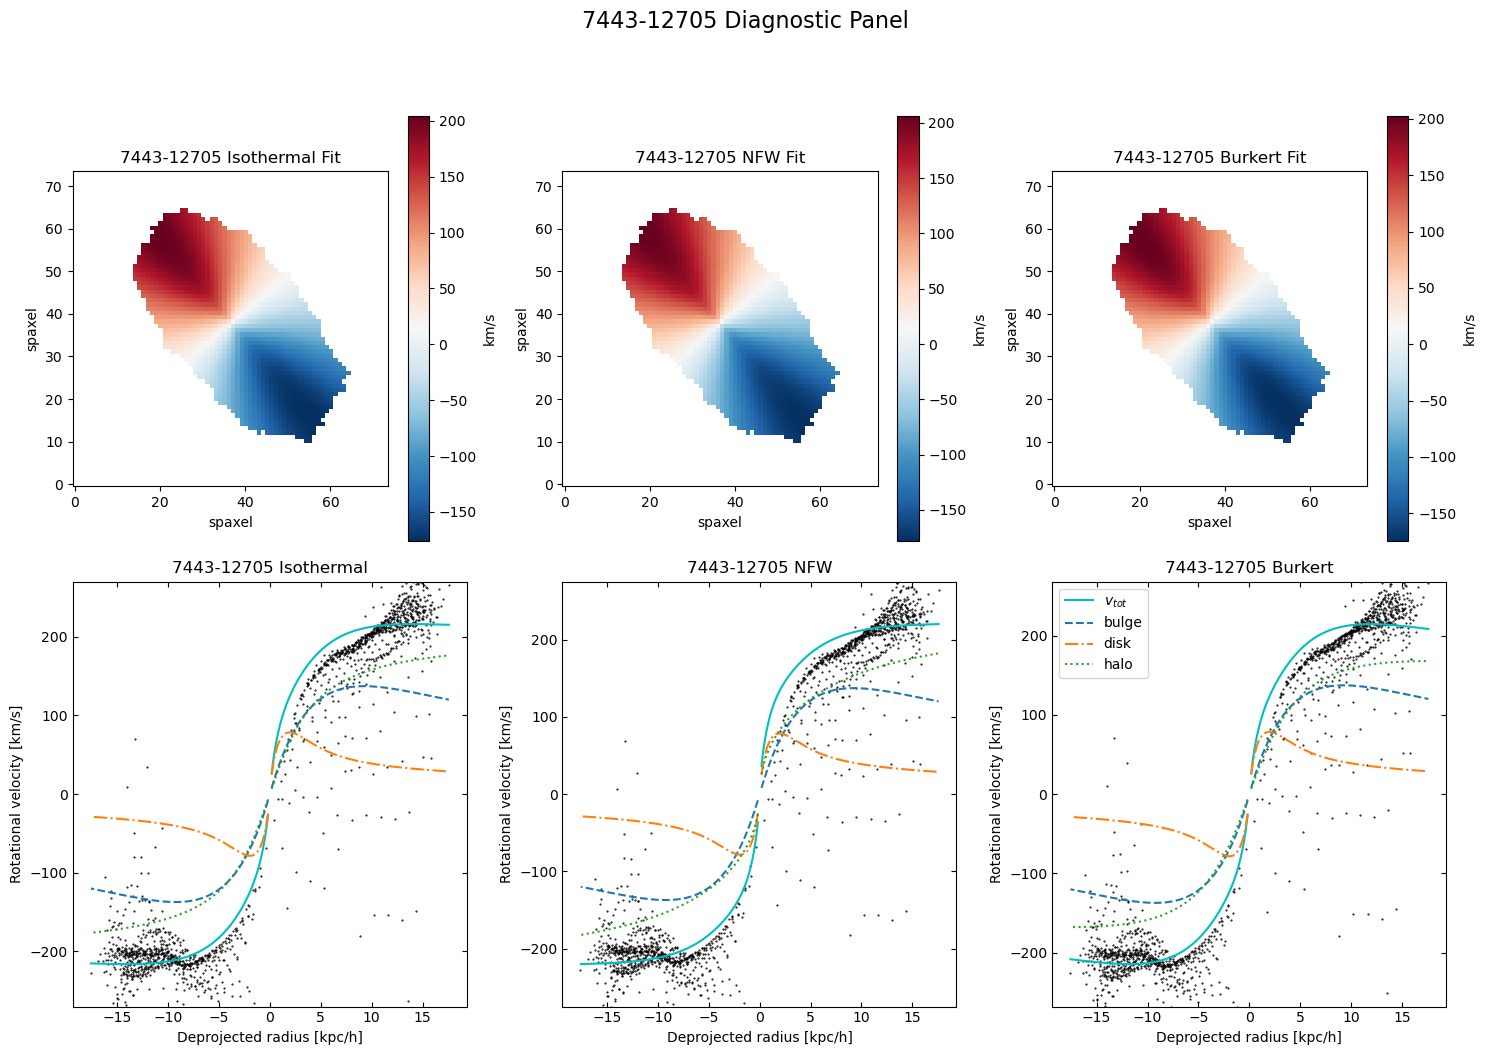

In [428]:
RC.plot_diagnostic_panel(gal_ID, shape, scale, iso_fit, NFW_fit, bur_fit, map_mask, maps['vmasked'],maps['ivarmasked'])


In [98]:
#NFW: -2,35  ISO: -1.2, 10, Bur: -1.5, 40

214.45686244725545


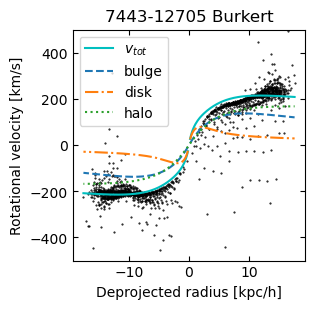

In [426]:
bur_test=[rho_bulge, R_bulge,SigD, Rd, -1.5, 40,incl,phi,37,37,23]
RC.plot_rot_curve(maps['vmasked'],maps['ivarmasked'], bur_fit,scale,gal_ID,'Burkert')
plt.gca().set_ylim(-500,500);
#plt.gca().set_xlim(-15,15);

In [330]:
best_fit_NFW_test = parameterfit_NFW(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:229: RuntimeWarning: invalid value encountered in double_scalars
  vel = np.sqrt(coeff_2 * F / r)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:347: RuntimeWarning: invalid value encountered in double_scalars
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:590: RuntimeWarning: invalid value encountered in double_scalars
  vel2 = G * (halo_mass * Msun) / (r * 3.08E16)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:589: RuntimeWarning: invalid value encountered in log
  halo_mass = 4*np.pi*rho0_h*Rh**3*((-r/(Rh+r)) + np.log(Rh + r) - np.log(Rh))


---------------------------------------------------
   direc: array([[ 0.00000000e+00,  1.06070667e-02,  0.00000000e+00,
         5.38230240e-03,  1.10883613e-01, -2.71081915e-01,
        -1.53298163e+00],
       [-4.23716294e-04, -3.94276204e-02, -3.27664990e-03,
         3.57646402e-03,  6.26768013e-02,  1.90320816e-02,
        -5.09545546e-02],
       [-3.94616607e-02,  6.70636362e-01,  4.35956599e-02,
         1.07462805e-02, -1.39324072e-01,  3.30150140e-01,
         3.01929128e+00],
       [-1.16836055e-02,  8.71408549e-02,  4.17192866e-03,
        -3.16928175e-03,  8.33271853e-02,  6.85325535e-02,
         5.31322728e-02],
       [-7.04177459e-02,  8.04881806e-01,  4.55960754e-02,
        -1.67164562e-02,  1.23652649e-02, -1.39182562e-01,
        -1.57163273e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 2.15104383e-03, -1.18508482e-01, -8.14283800e-03,
         8.5832

In [336]:
NFW_fit = [param_outputs['rho_bulge'], param_outputs['R_bulge'], param_outputs['Sigma_disk'],
               param_outputs['R_disk'],best_fit_NFW_test[0],best_fit_NFW_test[1],best_fit_NFW_test[2],best_fit_NFW_test[3],best_fit_NFW_test[4],best_fit_NFW_test[5],best_fit_NFW_test[6]]

In [427]:
print("Isothermal Chi2:", chi2(maps['vmasked'],maps['ivarmasked'], map_mask, shape, scale, iso_fit, "Isothermal"))
print("NFW Chi2:", chi2(maps['vmasked'],maps['ivarmasked'], map_mask, shape, scale, NFW_fit, "NFW"))
print("Burkert Chi2:", chi2(maps['vmasked'],maps['ivarmasked'], map_mask, shape, scale, bur_fit, "Burkert"))

Isothermal Chi2: (29354.89728904651, 18.508762477330713)
NFW Chi2: (31523.74911715107, 19.876260477396638)
Burkert Chi2: (30613.352174573352, 19.302239706540576)


In [413]:
best_fit_iso_test = parameterfit_iso(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

1.3432236922176852
[[-7, 2], [1, 1000], [0.8196249166193864, 1.4451326206513049], [0, 6.911503837897546], [32, 42], [32, 42], [-100, 100]]
---------------------------------------------------
   direc: array([[-4.48490906e-03,  4.96552570e-03,  7.59833432e-03,
         1.12387303e-02, -3.65443428e-02, -2.94526481e-01,
        -1.21517136e+00],
       [-1.35410892e-02,  7.24475265e-02, -7.58216255e-05,
         2.67075289e-03, -7.28732820e-03,  3.75344619e-04,
         8.04791084e-02],
       [-2.06225741e-02,  1.37016557e-02,  2.22917613e-02,
         6.79109796e-03,  1.45732405e-01,  1.65743545e-01,
         4.77799133e-01],
       [-7.31255204e-02,  3.17714654e-01,  1.28058545e-02,
        -3.15443564e-03,  9.02923358e-02, -9.26043500e-02,
        -1.22140102e+00],
       [-3.58775305e-02,  1.44959693e-01, -1.86920419e-02,
        -8.74138335e-04,  1.15008277e-02, -8.40872726e-02,
        -2.60101590e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e

In [414]:
iso_fit = [param_outputs['rho_bulge'], param_outputs['R_bulge'], param_outputs['Sigma_disk'],
               param_outputs['R_disk'],best_fit_iso_test[0],best_fit_iso_test[1],best_fit_iso_test[2],best_fit_iso_test[3],best_fit_iso_test[4],best_fit_iso_test[5],best_fit_iso_test[6]]

In [424]:
best_fit_bur_test = parameterfit_bur(param, rho_bulge, R_bulge,
                                        SigD, Rd, scale, shape,
                                        maps['vmasked'], maps['ivarmasked'], map_mask)

C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:672: RuntimeWarning: invalid value encountered in double_scalars
  vel2 = G * (halo_mass * Msun) / (r * 3.08E16)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:669: RuntimeWarning: invalid value encountered in log
  halo_mass = np.pi * (-rho0_h) * (Rh**3) * (-np.log(Rh**2 + r**2) - 2*np.log(Rh + r) + 2*np.arctan2(r,Rh) + np.log(Rh**2)\
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:670: RuntimeWarning: invalid value encountered in log
  + 2*np.log(Rh) - 2*np.arctan2(0,Rh))


---------------------------------------------------
   direc: array([[-1.48225392e-01,  3.90667645e-01,  1.40943238e-02,
         3.78988554e-03,  6.45125740e-01, -2.52322461e-01,
        -5.19462302e+00],
       [-1.81457951e-01,  5.56634361e-01,  4.98594141e-03,
        -6.88598468e-03, -3.27750597e-01, -2.02714847e-02,
         4.63673667e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00131527e-01,  6.50904372e-01,  1.88978947e-02,
        -6.82602928e-03,  2.06876138e-01, -1.28805123e-01,
        -2.64263786e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-1.99326598e-02,  1.51389836e-01,  5.02417225e-03,
         2.9167

In [425]:
bur_fit = [param_outputs['rho_bulge'], param_outputs['R_bulge'], param_outputs['Sigma_disk'],
               param_outputs['R_disk'],best_fit_bur_test[0],best_fit_bur_test[1],best_fit_bur_test[2],best_fit_bur_test[3],best_fit_bur_test[4],best_fit_bur_test[5],best_fit_bur_test[6]]

In [5]:
import combin_fit_functions